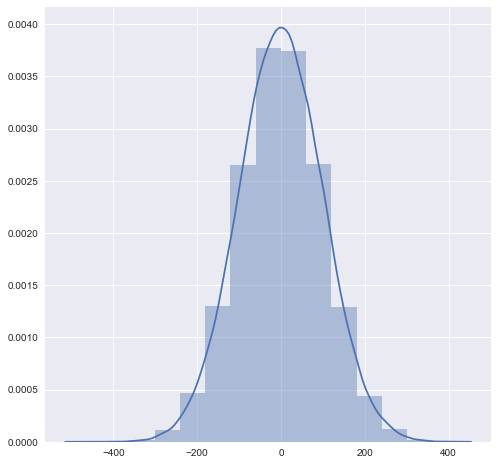

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
% matplotlib inline
mpl.rcParams['figure.figsize'] = (8, 8)

# Create data
N = 100000
m = 3.0
b = 12.0
x = np.random.uniform(0, 1000, N)
x = np.sort(x)
noise = np.random.normal(0, 100, N)
sns.distplot(noise, bins = 15, kde = True)
plt.show()

y = m*x + b + noise

# Plot 
#plt.scatter(x, y, alpha = 0.3)
#plt.title('Scatter plot')
#plt.xlabel('x')
#plt.ylabel('y')
#ax = plt.gca()
#ax.set_aspect('equal')

#guess_a = 3
#guess_b = 12

#guessed_y = guess_a * x + guess_b
#plt.scatter(x, guessed_y, alpha = 0.5, marker = ".")
#plt.show()

#def cost_function(actual_y, model_y):
#    return np.sum((actual_y - model_y) ** 2)/actual_y.shape[0] 

#print cost_function(y, guessed_y)    

In [38]:
# use a stupid brute force exhaustive search algorithm to find the best a and b
possible_as = np.arange(2, 4, 1)
possible_bs = np.arange(11, 13, 1)
print possible_as, possible_bs



[2 3] [11 12]


In [39]:
lowest_thiscost = float('inf')

for a_can in possible_as:
    for b_can in possible_bs:
        guessed_y = a_can * x + b_can
        this_cost = cost_function(y, guessed_y)
        if this_cost < lowest_thiscost:
            lowest_thiscost = this_cost
            best_a = a_can 
            best_b = b_can
            
print lowest_thiscost, best_a, best_b

NameError: name 'cost_function' is not defined

[-15.    -14.999 -14.998 ...,  17.997  17.998  17.999]


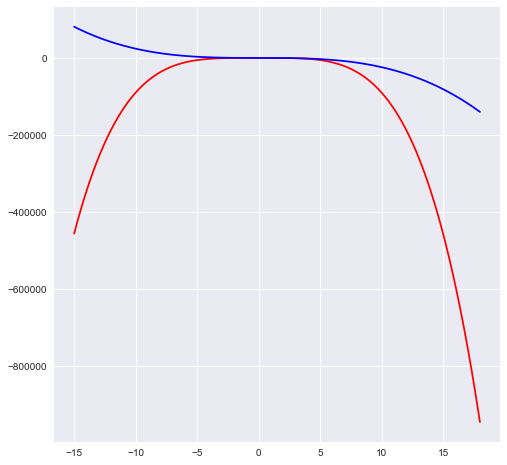

In [40]:
# lets plot a function curve

x = np.arange (-15, 18, 0.001)
print x

y = 3*x*4 - 9*x**4 + 5
dy = 12*x**3 - 36*x**3
plt.plot(x, y, color = "r")
plt.plot(x, dy, color = "b")

plt.show()

In [41]:
%time

import random

stopping_criteria = 0.00000000000000000000001
learning_rate = 0.00001
max_interations = 350
rx = random.random()*10

def dyhi(x):
    return 12*x**3 - 36*x**3

for i in xrange(max_interations):
    old_rx = rx
    rx += learning_rate*dyhi(rx)
    if abs(rx - old_rx) < stopping_criteria:
        break
        
print rx

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.96 µs
1.61649865699


70


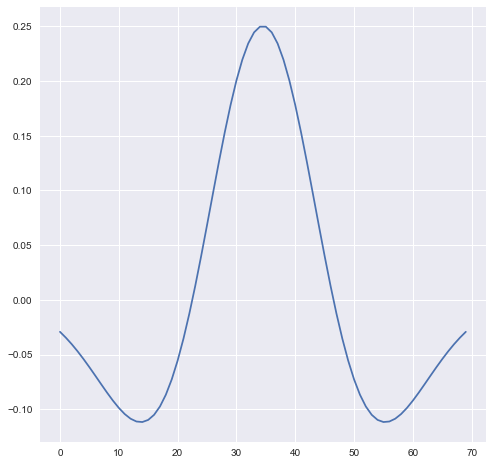

In [42]:
from scipy import signal
import matplotlib.pyplot as plt

points = 70

a = 12.0
vec2 = signal.ricker(points, a)
print(len(vec2))
plt.plot(vec2)
plt.show()

In [63]:
%%time

scaling_factor = max(np.max(x), np.max(y))/10.0
x_scaled = x/scaling_factor
y_scaled = y/scaling_factor


def partial_derivative_b(a, b, x, y):
    return np.mean(2*a*x + 2*b - 2*y)

def partial_derivative_a(a, b, x, y):
    return np.mean((2*a*x + 2*b - 2*y)*x)

stopping_criteria = 1e-5
learning_rate = 0.01
epochs = 10
batch_size = 100

num_points = len(x)
a = 0
b = 0
xy_arr = np.array([x_scaled, y_scaled]).T

for epoch in range(epochs):
    np.random.shuffle(xy_arr) 
    
    shuffled_x = xy_arr[:,0]
    shuffled_y = xy_arr[:,1]
    
    old_batch_a = a
    old_batch_b = b
    for i in xrange(num_points/batch_size):
        old_a = a
        old_b = b   
        
        batch_start_index = i*batch_size
        batch_end_index = (i+1)*batch_size
        
        this_batch_x = shuffled_x[batch_start_index:batch_end_index]
        this_batch_y = shuffled_y[batch_start_index:batch_end_index]
        
        a += -learning_rate*partial_derivative_a(old_a, old_b, this_batch_x, this_batch_y)
        b += -learning_rate*partial_derivative_b(old_a, old_b, this_batch_x, this_batch_y)
                        
    if abs(old_batch_a - a) < stopping_criteria and abs(old_batch_b - b) < stopping_criteria:
        break

    print 'training epoch ' + str(epoch + 1)
    print "a = ", a
    print "b = ", b * scaling_factor
    

training epoch 1
a =  2.9857639082
b =  21.5763293761
training epoch 2
a =  2.99517043933
b =  13.8603709999
training epoch 3
a =  2.99961136015
b =  13.5700438369
training epoch 4
a =  2.99694936323
b =  14.5979447806
training epoch 5
a =  3.00199540598
b =  14.0383483198
training epoch 6
a =  2.99802393242
b =  13.5130512304
training epoch 7
a =  2.98812320477
b =  13.0306469363
training epoch 8
a =  2.99565595024
b =  12.9085906781
training epoch 9
a =  2.99419007608
b =  13.4118607237
training epoch 10
a =  2.99441604515
b =  11.5166997632
CPU times: user 1.39 s, sys: 15 ms, total: 1.41 s
Wall time: 1.41 s
